In [2]:
# load all relevant packages
import time
begin = time.perf_counter()
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import lmfit
import glob
import csv

from fretbursts import *
from fretbursts.phtools.phrates import *

# set plot style in whole notebook
sns = init_notebook()
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5, rc={"grid.linewidth": 0,"axes.linewidth": 2})

In [3]:
# load .hdf5 files
filenames = glob.glob('H*')
for filename in filenames:
    if os.path.isfile(filename):
        print("Perfect, I found the file!")
    else:
            raise ValueError("Sorry, I can't find the file:\n%s" % filename)
            
d = []
for filename in filenames:
    d.append(loader.photon_hdf5(filename))

Perfect, I found the file!
Perfect, I found the file!
Perfect, I found the file!


In [4]:
# calculate background and perform a burst search
for dt in d:
        loader.alex_apply_period(dt)
        dt.calc_bg(fun=bg.exp_fit, time_s=30, tail_min_us='auto')
        dt.burst_search(m=10,F=6)

# Total photons (after ALEX selection):     2,733,622
#  D  photons in D+A excitation periods:    1,380,854
#  A  photons in D+A excitation periods:    1,352,768
# D+A photons in  D  excitation period:     1,751,243
# D+A photons in  A  excitation period:       982,379

 - Calculating BG rates ... Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
# Total photons (after ALEX selection):     2,830,788
#  D  photons in D+A excitation periods:    1,309,011
#  A  photons in D+A excitation periods:    1,521,777
# D+A photons in  D  excitation period:     1,751,955
# D+A photons in  A  excitation period:     1,078,833

 - Calculating BG rates ... Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background c

   - Applying background correction.
   - Applying background correction.
<class 'matplotlib.figure.Figure'>
   - Applying background correction.
   - Applying background correction.
<class 'matplotlib.figure.Figure'>
   - Applying background correction.
   - Applying background correction.
<class 'matplotlib.figure.Figure'>


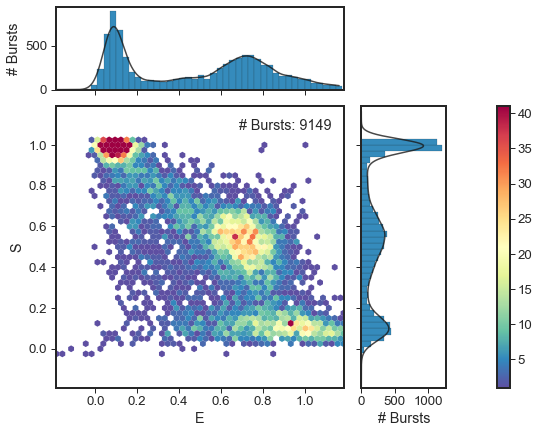

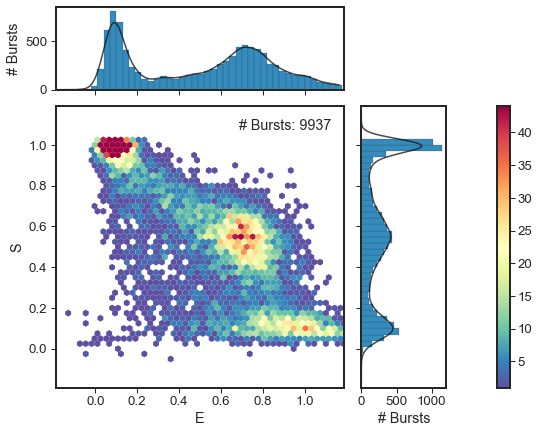

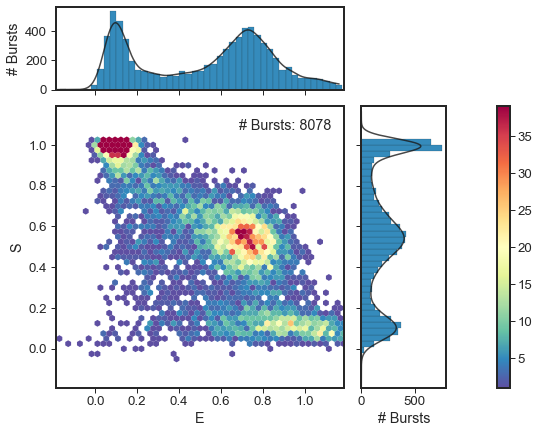

In [5]:
# burst selection. Note that no correction factors are applied yet
d1_all = []
for dt in d:
    dt.leakage = 0
    dt.dir_ex = 0
    dt.gamma = 1
    dt.beta = 1
    z=dt.select_bursts(select_bursts.size, add_naa=True, th1=40)
    d1_all.append(z) 
    alex_jointplot(z)

d1_FRET = []
for ds in d1_all:
    d2 = ds.select_bursts(select_bursts.size, th1=25)
    d3 = d2.select_bursts(select_bursts.naa, th1=15)
    d1_FRET.append(d3)

The above information is used to calculate leakage and direct excitation

(0.10524743488102646, 0.003920944131337442)

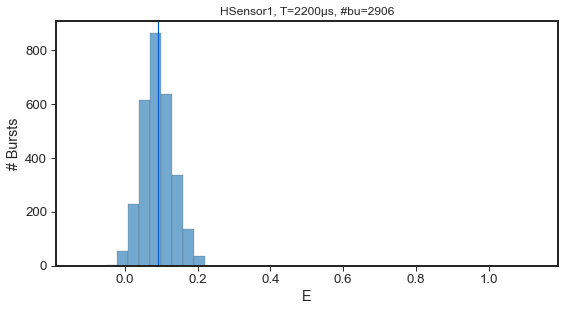

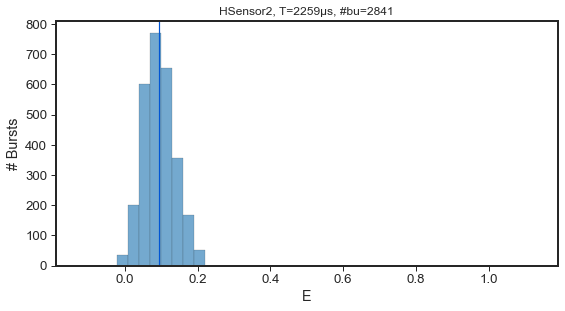

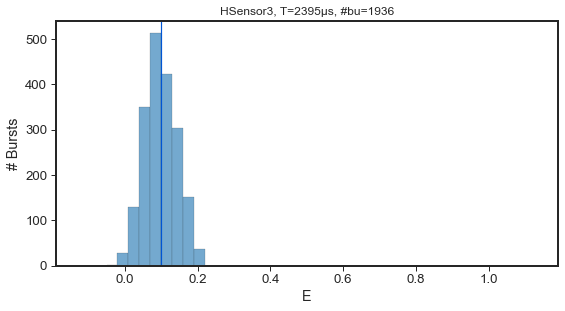

In [6]:
# to calculate leakage
d1_DO = []
d1_AO = []
for d1 in d1_all:
    d1_DO.append(d1.select_bursts(select_bursts.ES, S1=0.8, E2=0.2))
    d1_AO.append(d1.select_bursts(select_bursts.S, S2=0.2))
    
for d1 in d1_DO:
    dplot(d1, hist_fret, pdf=False)
    plt.axvline(np.mean(d1.E))
    
lk_arr = [np.mean(d1.E) / (1 - np.mean(d1.E)) for d1 in d1_DO]
av_Lk = np.mean(lk_arr)
av_Lk, np.std(lk_arr)

(0.11538872191090345, 0.0015099896476907543)

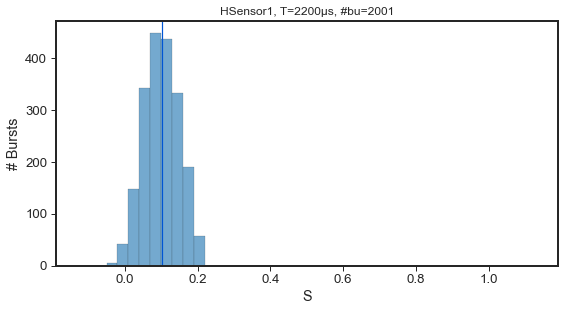

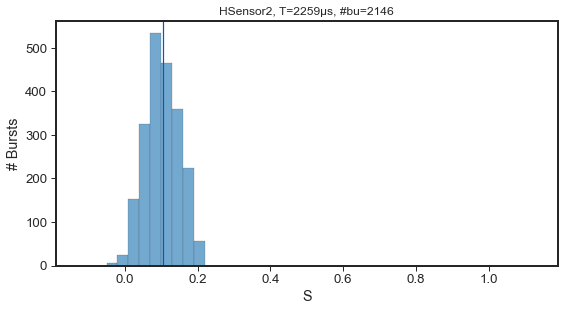

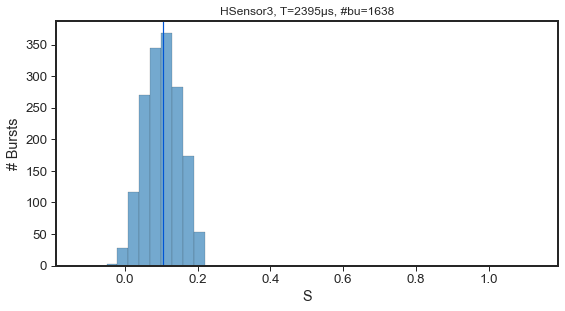

In [7]:
# to calculate direct excitation
for d1 in d1_AO:
    dplot(d1, hist_S, pdf=False)
    plt.axvline(np.mean(d1.S))

dir_arr = [np.mean(d1.S) / (1 - np.mean(d1.S)) for d1 in d1_AO]
dir_arr
av_Dir = np.average(dir_arr) 
av_Dir, np.std(dir_arr)

   - Applying background correction.
   - Applying leakage correction.
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
<class 'matplotlib.figure.Figure'>
   - Applying background correction.
   - Applying leakage correction.
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
<class 'matplotlib.figure.Figure'>
   - Applying background correction.
   - Applying leakage correction.
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
<class 'matplotlib.figure.Figure'>


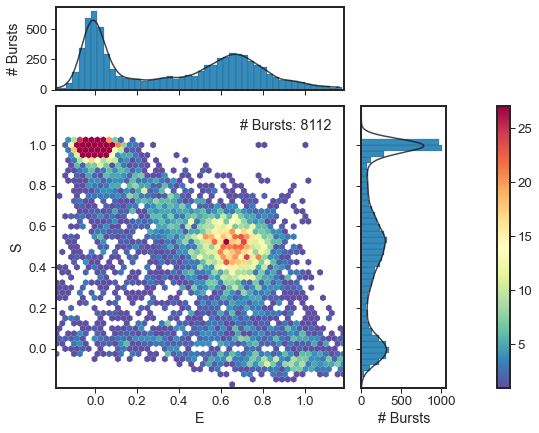

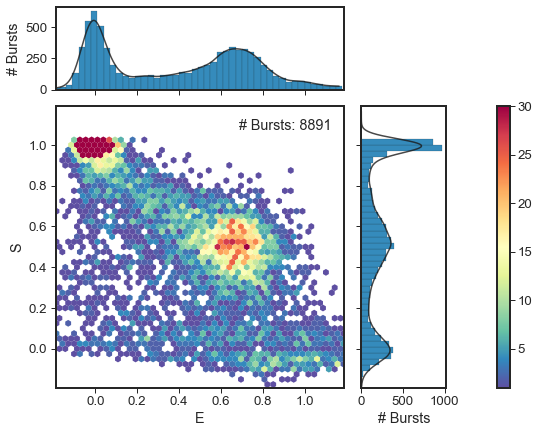

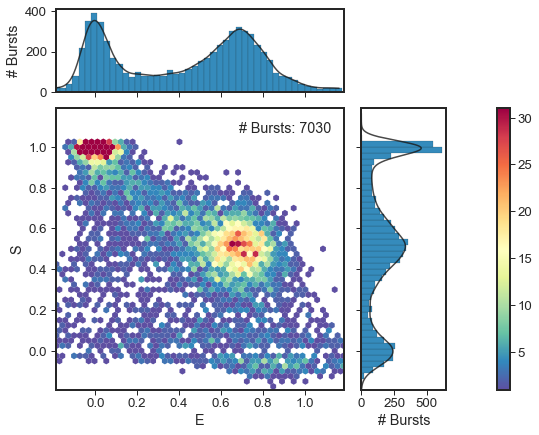

In [8]:
# data is plotted again, but note that the data is now corrected for leakage and direct excitation
d1_all = []
for dt in d:
    dt.leakage = av_Lk
    dt.dir_ex = av_Dir
    dt.gamma = 1
    dt.beta = 1
    z=dt.select_bursts(select_bursts.size, add_naa=True, th1=40)
    d1_all.append(z) 
    alex_jointplot(z)

d1_FRET = []
for ds in d1_all:
    d2 = ds.select_bursts(select_bursts.size, th1=25)
    d3 = d2.select_bursts(select_bursts.naa, th1=15)


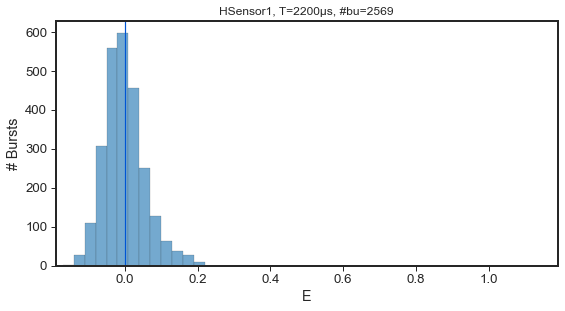

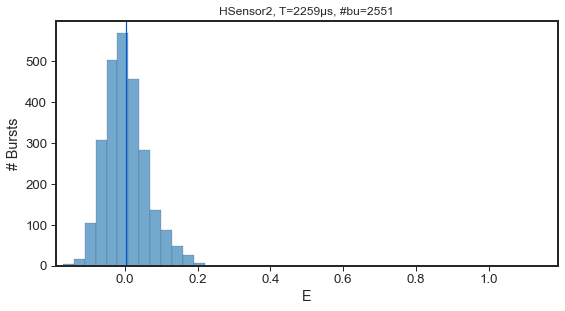

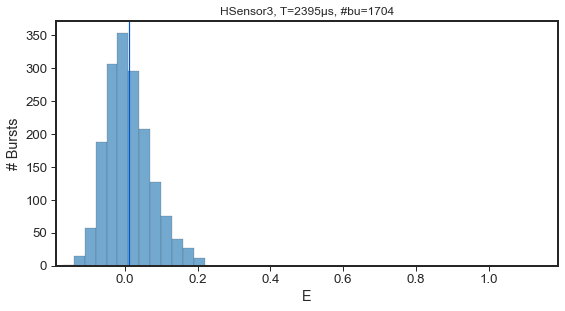

In [9]:
# lets check for leakage if the applied correction factor indeed resulted in an average E of 0 for the donor only population
d1_DO = []
d1_AO = []
for d1 in d1_all:
    d1_DO.append(d1.select_bursts(select_bursts.ES, S1=0.8, E2=0.2))
    d1_AO.append(d1.select_bursts(select_bursts.S, S2=0.2))
    
for d1 in d1_DO:
    dplot(d1, hist_fret, pdf=False)
    plt.axvline(np.mean(d1.E))

In [10]:
#calculate background and perform a burst search
d_corr = loader.photon_hdf5(filenames)
loader.alex_apply_period(d_corr)
d_corr.calc_bg(fun=bg.exp_fit, time_s=30, tail_min_us='auto')
d_corr.burst_search(m=10,F=6)

# Total photons (after ALEX selection):     8,145,926
#  D  photons in D+A excitation periods:    3,844,956
#  A  photons in D+A excitation periods:    4,300,970
# D+A photons in  D  excitation period:     5,054,828
# D+A photons in  A  excitation period:     3,091,098

 - Calculating BG rates ... Channel 0
Channel 1
Channel 2
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]


   - Applying background correction.
   - Applying leakage correction.
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
<class 'matplotlib.figure.Figure'>


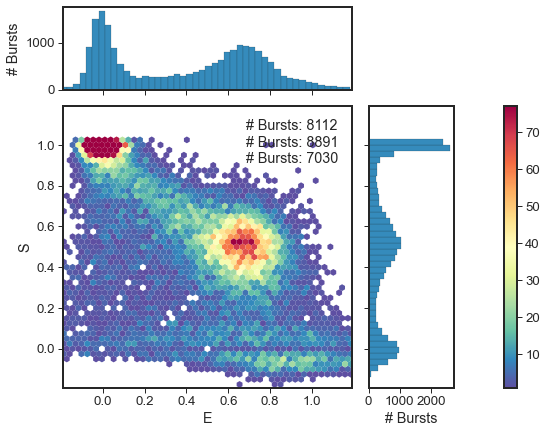

In [11]:
# burst selection
d_corr.leakage = av_Lk
d_corr.dir_ex = av_Dir
d_corr.gamma = 1
d_corr.beta = 1
d1_corr = d_corr.select_bursts(select_bursts.size, add_naa=True, th1=40)
fig = alex_jointplot(d1_corr,i=None)

<class 'matplotlib.figure.Figure'>


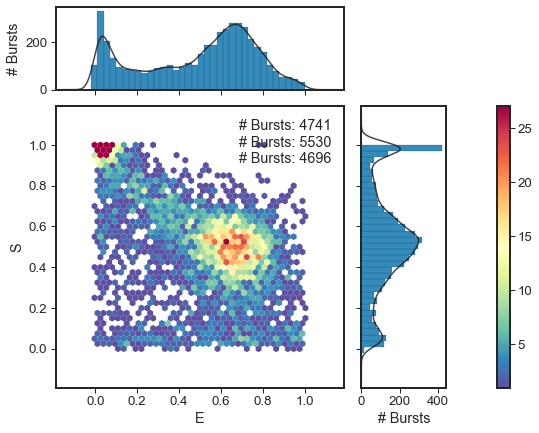

In [15]:
# roi 0.25-0.85 for FRET distribution, 0-1 for ES plot
roi = dict(E1=0.0, E2=1, S1=0, S2=1, rect=True)
d_fret_mix = d1_corr.select_bursts(select_bursts.ES, **roi)
g = alex_jointplot(d_fret_mix)

In [16]:
#Export selected bursts
bursts = bext.burst_data(d_fret_mix, include_bg=True, include_ph_index=True)
#bursts.to_csv('HSensor.csv')